In [10]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle 

In [11]:
# Loading the dataset
df= pd.read_csv("./data/phishing_site_urls.csv")

In [12]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [14]:
df.shape

(549346, 2)

In [15]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

2
URL                                                                                                                                                                                                                                      Label
jhomitevd2abj3fk.onion.to/                                                                                                                                                                                                               bad      52
jhomitevd2abj3fk.tor2web.org/                                                                                                                                                                                                            bad      52
zjfq4lnfbs7pncr5.onion.to/                                                                                                                                                                                                               bad      44
zjfq4lnfbs7pncr5.tor2web

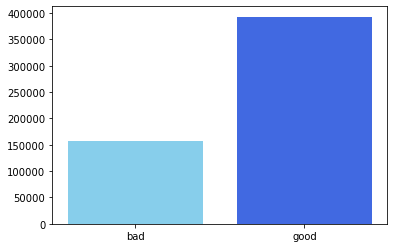

In [47]:
#df.plot(kind='bar')
print(len(df.loc[0]))
print((df[df.Label == 'bad'].value_counts()))

x=[1,2]  # 确定柱状图数量,可以认为是x方向刻度
y=[len(df[df.Label == 'bad']),len(df[df.Label == 'good'])]  # y方向刻度

color=['skyblue','royalblue']
x_label=["bad","good"]
plt.xticks(x, x_label)  # 绘制x刻度标签
plt.bar(x, y, color=color)

plt.show()

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
tokenizer.tokenize(df.URL[0])
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
m=0#统计最长的数据
for i in range(len(df)):
    if len(df.loc[i][2])>m:
        m=len(df.loc[i][2])
print(m)

375


In [50]:
l=[0 for i in range(375)]
'''
for i in range(len(df)):
    for j in range(len(df.loc[i][2])):
        l[j]+=1
'''
l=[547537, 546228, 510593, 466052, 403787, 318454, 242202, 184269, 140683, 109056, 87121, 71129, 58977, 50111, 42709, 36849, 32156, 28251, 25126, 22424, 20310, 18442, 16705, 15213, 14051, 13034, 12208, 11447, 10769, 10198, 9613, 9154, 8632, 8166, 7752, 7306, 6899, 6478, 6159, 5869, 5614, 5360, 5137, 4920, 4695, 4429, 4071, 3789, 3516, 3281, 3064, 2841, 2613, 2401, 2219, 1991, 1820, 1639, 1468, 1343, 1234, 1127, 1031, 978, 912, 850, 800, 767, 726, 685, 662, 634, 604, 591, 566, 557, 536, 516, 497, 476, 458, 435, 417, 408, 397, 379, 350, 335, 329, 321, 314, 309, 304, 293, 277, 264, 253, 229, 217, 206, 188, 181, 170, 158, 148, 138, 129, 119, 111, 103, 89, 84, 80, 79, 74, 68, 67, 65, 62, 60, 60, 58, 58, 55, 55, 53, 53, 52, 52, 50, 50, 50, 50, 47, 47, 47, 47, 47, 47, 46, 39, 39, 35, 33, 33, 31, 29, 29, 28, 28, 27, 25, 22, 20, 18, 18, 18, 13, 12, 12, 12, 12, 12, 10, 10, 9, 9, 9, 9, 9, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(l)


[547537, 546228, 510593, 466052, 403787, 318454, 242202, 184269, 140683, 109056, 87121, 71129, 58977, 50111, 42709, 36849, 32156, 28251, 25126, 22424, 20310, 18442, 16705, 15213, 14051, 13034, 12208, 11447, 10769, 10198, 9613, 9154, 8632, 8166, 7752, 7306, 6899, 6478, 6159, 5869, 5614, 5360, 5137, 4920, 4695, 4429, 4071, 3789, 3516, 3281, 3064, 2841, 2613, 2401, 2219, 1991, 1820, 1639, 1468, 1343, 1234, 1127, 1031, 978, 912, 850, 800, 767, 726, 685, 662, 634, 604, 591, 566, 557, 536, 516, 497, 476, 458, 435, 417, 408, 397, 379, 350, 335, 329, 321, 314, 309, 304, 293, 277, 264, 253, 229, 217, 206, 188, 181, 170, 158, 148, 138, 129, 119, 111, 103, 89, 84, 80, 79, 74, 68, 67, 65, 62, 60, 60, 58, 58, 55, 55, 53, 53, 52, 52, 50, 50, 50, 50, 47, 47, 47, 47, 47, 47, 46, 39, 39, 35, 33, 33, 31, 29, 29, 28, 28, 27, 25, 22, 20, 18, 18, 18, 13, 12, 12, 12, 12, 12, 10, 10, 9, 9, 9, 9, 9, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [14]:
for i in range(len(l)):
    if l[i]<1000:
        break
print(i)

63


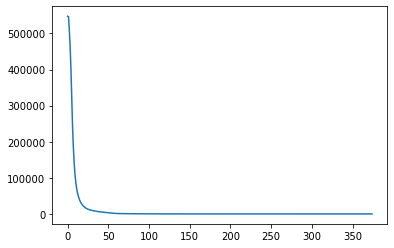

In [15]:
plt.plot(range(len(l)),l)

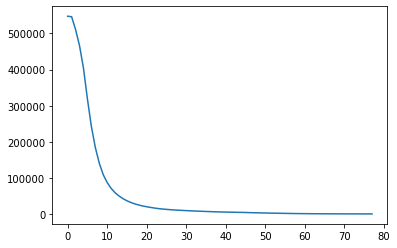

In [16]:
plt.plot(range(78),l[0:78])

### SnowballStemmer
#### Snowball is a small string processing language that gives the root words

In [17]:
stemmer = SnowballStemmer("english")
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [21]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [22]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [24]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


## Creating Model
### CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [25]:
cv = CountVectorizer()

In [26]:
feature = cv.fit_transform(df.text_sent)

In [27]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

In [30]:
#逻辑回归

from sklearn.linear_model import LogisticRegression


In [31]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

C:\Users\wrl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
lr.score(testX,testY)

0.9648019106285998

#### Logistic Regression provide 96% accuracy,Now we will store the score in the dictionary so that we can find which model performs the best.


In [33]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9792504532667976
Testing Accuracy : 0.9648019106285998

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94      1372
        Good       0.99      0.96      0.98      3628

    accuracy                           0.96      5000
   macro avg       0.95      0.97      0.96      5000
weighted avg       0.97      0.96      0.97      5000


CONFUSION MATRIX


<AxesSubplot:>

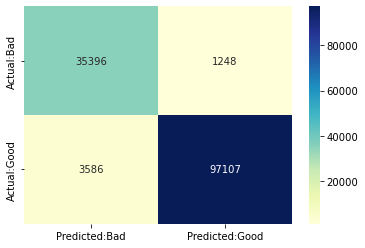

In [34]:
print('train acc:',lr.score(trainX,trainY))
print('test acc:',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print(classification_report(lr.predict(testX[0:5000]), testY[0:5000],
                            target_names =['Bad','Good']))

In [35]:
#朴素贝叶斯
#随机森林
#svm
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
# create mnb object
mnb = MultinomialNB()
#mnb = RandomForestClassifier()
#mnb=SVC()
#trainX=trainX[0:5000]
#trainY=trainY[0:5000]

In [37]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [38]:
mnb.score(testX,testY)

0.958408877432884

#### MultinomialNB provide 95% accuracy,so we can store the score in the dictionary

In [39]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740321206575584
Testing Accuracy : 0.958408877432884

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38134
        Good       0.98      0.97      0.97     99203

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

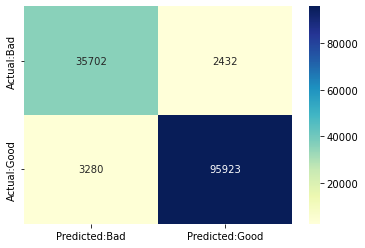

In [40]:
print('train acc:',mnb.score(trainX,trainY))
print('test acc:',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

C:\Users\wrl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Accuracy'>

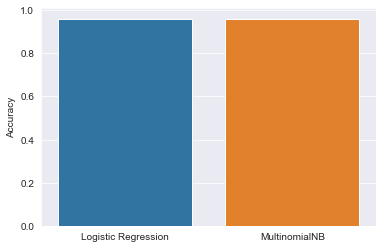

In [41]:
# Lets compare the two models and find out which one is best.
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

#### So, Logistic Regression is the best fit model, Now lets make sklearn pipeline using Logistic Regression

In [42]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [43]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [44]:
pipeline_ls.fit(trainX,trainY)

C:\Users\wrl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [45]:
pipeline_ls.score(testX,testY)

0.9668042843516313

Training Accuracy : 0.9807844003407693
Testing Accuracy : 0.9668042843516313

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36869
        Good       0.99      0.97      0.98    100468

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

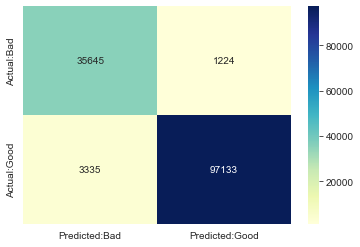

In [46]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### Lets dump the model in pickle.

In [47]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [48]:
import pickle 
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
try:
    result = loaded_model.score(testX,testY)
    print(result)
except:
    pass

0.9668042843516313


#### Thats it. Now the pkl file is deployed into Heroku and can be used to create an app.
#### If you like the Notebook , do upvote.

In [49]:
loaded_model.predict(["www.baidu.com"])

array(['good'], dtype=object)